<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.389693,93.189662,23.496562,884.767541,1032.843459,398.129190,634.714269
1,0.0,1.0,98.292749,49.615176,93.369343,-991.362594,-740.085326,-2.953645,-737.131681
2,0.0,2.0,53.155170,47.983001,84.828972,350.322254,546.289398,6.492845,539.796553
3,0.0,3.0,27.955944,26.213191,92.218743,-220.169927,-63.782050,-99.219628,35.437579
4,0.0,4.0,81.042157,78.269938,80.106323,-1681.351819,-1431.933401,121.907163,-1553.840563
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,62.987188,88.355206,58.748101,-582.397040,-362.306545,161.242710,-523.549256
119996,999.0,116.0,62.133008,70.524051,36.127899,-187.342610,-8.557652,132.818015,-141.375667
119997,999.0,117.0,23.358885,33.311270,57.991327,220.398998,345.060481,367.744263,-22.683782
119998,999.0,118.0,43.960608,71.290204,61.508693,846.348253,1033.107758,252.262543,780.845215


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    21.389693  93.189662  ...  398.129190   634.714269
      1.0    98.292749  49.615176  ...   -2.953645  -737.131681
      2.0    53.155170  47.983001  ...    6.492845   539.796553
      3.0    27.955944  26.213191  ...  -99.219628    35.437579
      4.0    81.042157  78.269938  ...  121.907163 -1553.840563
...                ...        ...  ...         ...          ...
999.0 115.0  62.987188  88.355206  ...  161.242710  -523.549256
      116.0  62.133008  70.524051  ...  132.818015  -141.375667
      117.0  23.358885  33.311270  ...  367.744263   -22.683782
      118.0  43.960608  71.290204  ...  252.262543   780.845215
      119.0  34.685859  30.665491  ...  328.454712  -804.644121

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    21.389693  93.189662  ...  398.129190   634.714269
      1.0    98.292749  49.615176  ...   -2.953645  -737.131681
      2.0    53.155170  47.983001  ...    6.492845   539.796553
      3.0    27.955944  26.213191  ...  -99.219628    35.437579
      4.0    81.042157  78.269938  ...  121.907163 -1553.840563
...                ...        ...  ...         ...          ...
999.0 115.0  62.987188  88.355206  ...  161.242710  -523.549256
      116.0  62.133008  70.524051  ...  132.818015  -141.375667
      117.0  23.358885  33.311270  ...  367.744263   -22.683782
      118.0  43.960608  71.290204  ...  252.262543   780.845215
      119.0  34.685859  30.665491  ...  328.454712  -804.644121

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.389693,93.189662,23.496562,884.767541,1032.843459,398.129190,634.714269
1,0.0,1.0,98.292749,49.615176,93.369343,-991.362594,-740.085326,-2.953645,-737.131681
2,0.0,2.0,53.155170,47.983001,84.828972,350.322254,546.289398,6.492845,539.796553
3,0.0,3.0,27.955944,26.213191,92.218743,-220.169927,-63.782050,-99.219628,35.437579
4,0.0,4.0,81.042157,78.269938,80.106323,-1681.351819,-1431.933401,121.907163,-1553.840563
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,62.987188,88.355206,58.748101,-582.397040,-362.306545,161.242710,-523.549256
119996,999.0,116.0,62.133008,70.524051,36.127899,-187.342610,-8.557652,132.818015,-141.375667
119997,999.0,117.0,23.358885,33.311270,57.991327,220.398998,345.060481,367.744263,-22.683782
119998,999.0,118.0,43.960608,71.290204,61.508693,846.348253,1033.107758,252.262543,780.845215


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    21.389693  93.189662  ...  398.129190   634.714269
      1.0    98.292749  49.615176  ...   -2.953645  -737.131681
      2.0    53.155170  47.983001  ...    6.492845   539.796553
      3.0    27.955944  26.213191  ...  -99.219628    35.437579
      4.0    81.042157  78.269938  ...  121.907163 -1553.840563
...                ...        ...  ...         ...          ...
999.0 115.0  62.987188  88.355206  ...  161.242710  -523.549256
      116.0  62.133008  70.524051  ...  132.818015  -141.375667
      117.0  23.358885  33.311270  ...  367.744263   -22.683782
      118.0  43.960608  71.290204  ...  252.262543   780.845215
      119.0  34.685859  30.665491  ...  328.454712  -804.644121

[120000 rows x 7 columns]

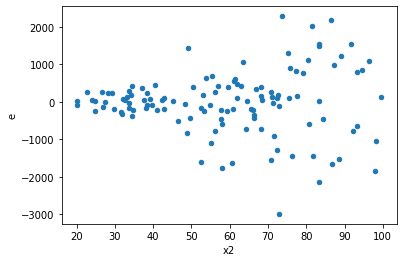

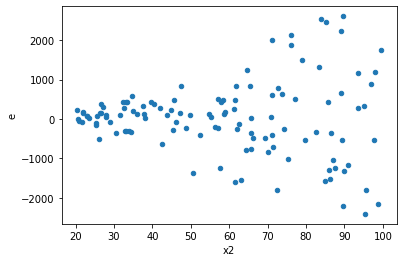

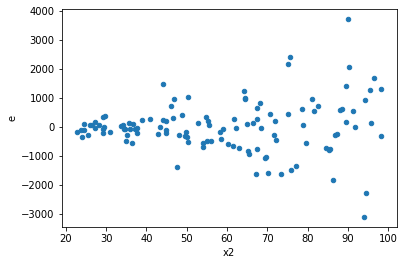

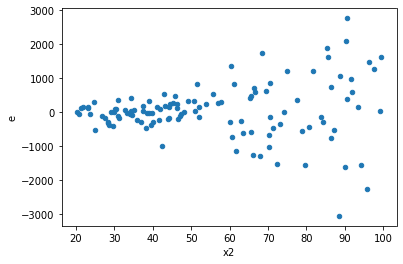

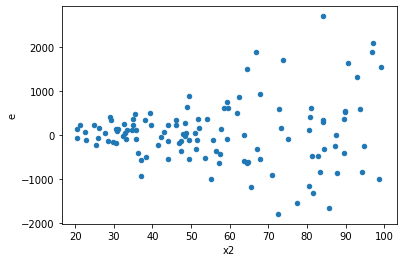

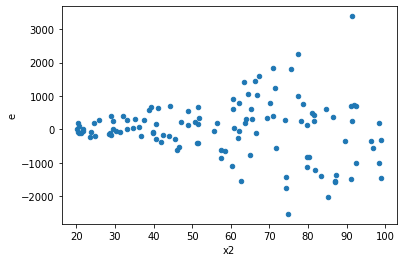

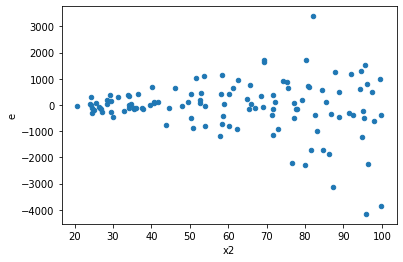

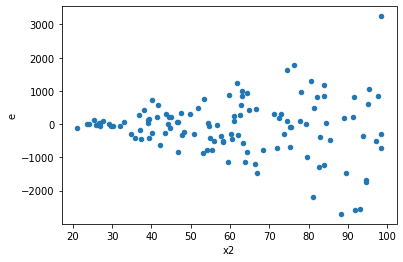

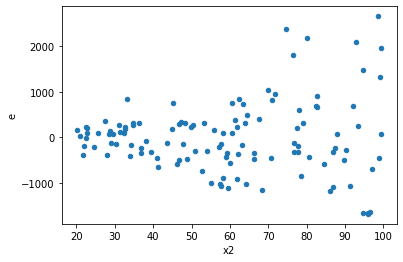

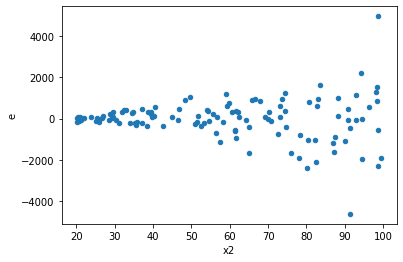

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,67.0,47.0,34792543.34651888,32365970.407413796,519291.6917390878,688637.6682428467,1.3261095434371881,0.30850386858093515,0.8457480657095324,0.15425193429046757,Reject005=1 : Homoscedasticity
3.0,71.0,43.0,20558308.718872216,46654301.9139659,289553.6439277777,1084983.7654410675,3.7470906969890905,9.888560583926065e-06,0.999995055719708,4.9442802919630324e-06,Reject005=0 : Heteroscedasticity
6.0,64.0,50.0,33369585.732983276,27417569.70508548,521399.7770778637,548351.3941017096,1.051690887124835,0.8596476430246582,0.5701761784876709,0.4298238215123291,Reject005=1 : Homoscedasticity
7.0,53.0,61.0,10539025.876766946,68710691.30944814,198849.54484465937,1126404.7755647236,5.664608266740904,3.6150904492160407e-10,0.9999999998192455,1.8075452246080204e-10,Reject005=0 : Heteroscedasticity
10.0,51.0,63.0,24314515.225640647,57180584.36380724,476755.2005027578,907628.3232350355,1.9037617676281338,0.015425863679811691,0.9922870681600942,0.0077129318399058455,Reject005=0 : Heteroscedasticity
11.0,55.0,59.0,42310147.74815513,50917360.54382381,769275.4136028206,863006.1109122679,1.1218428350263652,0.66347106356704,0.66826446821648,0.33173553178352,Reject005=1 : Homoscedasticity
14.0,54.0,60.0,6593123.422478419,54224971.69414328,122094.8781940448,903749.5282357213,7.402026535457094,1.1810552535962415e-12,0.9999999999994095,5.905276267981208e-13,Reject005=0 : Heteroscedasticity
15.0,54.0,60.0,7954164.378694861,70463871.44336236,147299.34034620112,1174397.8573893725,7.972865693961409,2.1294077612310502e-13,0.9999999999998935,1.0647038806155251e-13,Reject005=0 : Heteroscedasticity
16.0,54.0,60.0,9909755.895659707,104008862.57306294,183513.99806777237,1733481.0428843824,9.446042596947846,3.774758283725532e-15,0.9999999999999981,1.887379141862766e-15,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,55.0,74532700.44320896,19529365.510893382,1263266.1092069317,355079.3729253342,0.2810804234653696,3.231814448447118e-06,Reject005=0 : Heteroscedasticity
1.0,67.0,47.0,34792543.34651888,32365970.407413796,519291.6917390878,688637.6682428467,1.3261095434371881,0.30850386858093515,Reject005=1 : Homoscedasticity
2.0,46.0,68.0,34084833.59651974,26814814.760350104,740974.643402603,394335.5111816192,0.5321848928200907,0.024730714128675477,Reject005=0 : Heteroscedasticity
3.0,71.0,43.0,20558308.718872216,46654301.9139659,289553.6439277777,1084983.7654410675,3.7470906969890905,9.888560583926065e-06,Reject005=0 : Heteroscedasticity
4.0,58.0,56.0,46664214.022454925,36608324.87971054,804555.4141802574,653720.0871376882,0.81252338324483,0.43451327515306376,Reject005=1 : Homoscedasticity
5.0,59.0,55.0,51060441.76313966,31327018.741229583,865431.216324401,569582.158931447,0.6581483868244741,0.11582985455020434,Reject005=1 : Homoscedasticity
6.0,64.0,50.0,33369585.732983276,27417569.70508548,521399.7770778637,548351.3941017096,1.051690887124835,0.8596476430246582,Reject005=1 : Homoscedasticity
7.0,53.0,61.0,10539025.876766946,68710691.30944814,198849.54484465937,1126404.7755647236,5.664608266740904,3.6150904492160407e-10,Reject005=0 : Heteroscedasticity
8.0,68.0,46.0,51884902.75243772,22882961.928953562,763013.2757711429,497455.6941076861,0.6519620429997501,0.10723388878421103,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    574
Reject005=1 : Homoscedasticity      426
Name: Result_test, dtype: int64